In [12]:
# import matplotlib
# matplotlib.use('Agg')
import pandas as pd
from textblob import TextBlob
# import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("tweets.csv")

In [14]:
df_tweets = df['tweet']
df_tweets.dropna(how='all', inplace=True)
polarity=0


In [15]:
import re
import emoji

count_pos = 0
count_neg = 0
tweet_polarity = []
for tweet in df_tweets:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    analysis = TextBlob(tweet)
    tweet_polarity.append(analysis.sentiment.polarity)
    polarity += analysis.sentiment.polarity
    if analysis.sentiment.polarity <0:
        count_neg+=1
    else:
        count_pos+=1

df['score'] = tweet_polarity
# polarity
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,score
0,1515345123105980422,1515293448685113351,2022-04-16 17:03:25 Egypt Standard Time,2022-04-16,17:03:25,200,4863154803,shajhanxp35,Shajhan Ahmed,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'hyperwalk', 'name': 'Hyper W...",NaN,NaN,NaN,NaN,-0.133333
1,1515345108421554184,1515345108421554184,2022-04-16 17:03:22 Egypt Standard Time,2022-04-16,17:03:22,200,344657887,tha_given,🌻Keneilwe👽,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000
2,1515345102662942720,1515345102662942720,2022-04-16 17:03:20 Egypt Standard Time,2022-04-16,17:03:20,200,705499454955065344,sneakers_shopww,お洒落でかわいい海外のスニーカー達☻,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.000000
3,1515345071922728962,1515339060524498945,2022-04-16 17:03:13 Egypt Standard Time,2022-04-16,17:03:13,200,1191805176635645956,1cyrusken,BlackGem_Cyrus,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'sneakerheadsoff', 'name': 'S...",NaN,NaN,NaN,NaN,0.000000
4,1515345067514335239,1515345067514335239,2022-04-16 17:03:12 Egypt Standard Time,2022-04-16,17:03:12,200,1248407685680099332,noseasputito,Peter Hurt,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,-0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22401,1519728996782587905,1518321578357972992,2022-04-28 19:23:22 Egypt Standard Time,2022-04-28,19:23:22,200,15456626,lissaknudsen,lissa 🌻🐝🍃🇺🇦,NaN,...,NaN,NaN,NaN,NaN,"[{'screen_name': 'andreawaner', 'name': 'Andre...",NaN,NaN,NaN,NaN,0.250000
22402,1519728978176663558,1519728945867993088,2022-04-28 19:23:18 Egypt Standard Time,2022-04-28,19:23:18,200,1001654384743387137,fozzydiablo,Fudzy,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.290000
22403,1519728967095365632,1519728945867993088,2022-04-28 19:23:15 Egypt Standard Time,2022-04-28,19:23:15,200,1001654384743387137,fozzydiablo,Fudzy,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.200000
22404,1519728950682996737,1519728945867993088,2022-04-28 19:23:11 Egypt Standard Time,2022-04-28,19:23:11,200,1001654384743387137,fozzydiablo,Fudzy,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,0.136364


<AxesSubplot:ylabel='None'>

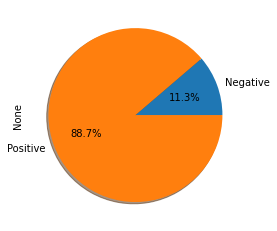

In [16]:
neg_pos_series = pd.Series([count_neg, count_pos], index=['Negative', 'Positive'])
neg_pos_series.plot.pie(autopct='%1.1f%%', shadow=True, y='Sentiment')